<a href="https://colab.research.google.com/github/HauwaUmar/House-Price-Prediction/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Executive Summary**

The project's goal is to forecast the price of residential properties in Ames, Iowa. The price of each home was estimated using linear regression. A training and testing dataset was given to us so that we could use it to run our model. To make this forecast,  79 explanatory variables were made available. The features provided different details about the house, for example the number of rooms in a house or the condition of the house. Features provided were both numerical and non-numerical data types. 


**Numerical columns**

Examples of numerical columns provides are:
```
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Fireplaces: Number of fireplaces
GarageArea: Size of garage in square feet
````
**Non-numerical columns**

Other columns contained categorical data i.e. ordinal and nominal data 

Example of columns with nominal data:
```
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
```
Examples of columns with ordinal data:
```
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement
```
I joined the train and test data set for the data preprocessing.
Following my exploration of the data set, I discovered the following: 
- I noticed the target variable (i.e. the sale perice) is not normally distributed. This was solved by transforming it by logging it.  
- Some columns had up to 50% of missing data. Others had just a few missing. I discarded the columns with a lot of missing data and analysed the other columns individually.
- There were either nominal or ordinal data types in the non-numeric columns. Columns with ordinal datatypes that contain information in their ordering set were converted to integers using a label encoder, whereas columns with nominal datatypes were transposed using dummy variables.

------------------------------------------------------------------------------

I have 236 features to deal with after the preprocessing and transformation of the dataset. I conducted a linear regression with all the variables and split the dataset back into the training and testing dataset that were initially provided.
After doing cross-validation using cross_val_score, which is essentially a library used to ensure that all observations are used for both testing and training of a model, the model performed reasonably well. It received an overall score of 84%.


------------------------------------------------------------------------------

I chose to use the backward elimination strategy to eliminate the variables that were the least significant after noticing some variables in the model summary had lesser significance.

------------------------------------------------------------------------------


After the feature selection process, 107 features were returned which means 129 columns were removed from the dataset. I noticed a lot of categorical columns were discared. For example, information about the Exterior covering on house played little role in the price of the house. And was taken out.


------------------------------------------------------------------------------

I created a new model using the 107 variables, and after cross-validating, it increased by 2%, going from 84% to 86%. Although it's not much of an improvement, it's still an improvement.




## **Kaggle Score**

My Kaggle score is 0.14204

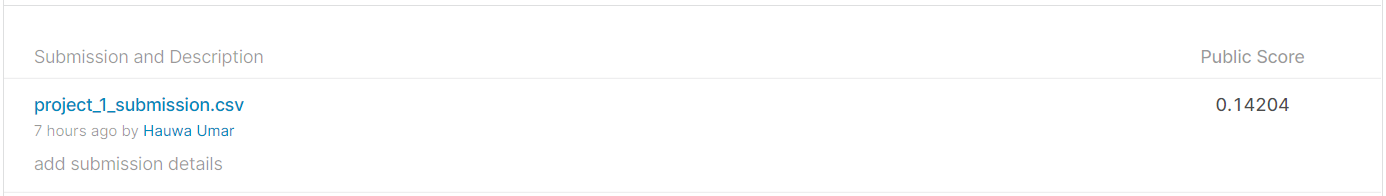

# **Ethic Discussion**

The dataset was created by Dean De Cock and is available to the general public. For the purpose of learning more about data science, it is accessible on Kaggle.

- Looking over the dataset, it does not include any details about the residents of the house.

- Although the method of data compilation is not specified, a trustworthy source did it.

- The real estate market may be impacted by predictions of home prices, and erroneous information may cause false price spikes that may be harmful. 




# **Detailed Result**

## **Importing libraries and loading datasets**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm, skew #for some statistics
from sklearn.model_selection import KFold, cross_val_score #for cross validation
pd.set_option('display.min_rows', 4)

In [ ]:
#load the train and test dataset
train_dataset = pd.read_csv("train.csv")
true_test_dataset = pd.read_csv("test.csv")

#check the numbers of samples and features
print("The train data size: {} ".format(train_dataset.shape))
print("The test data size: {} ".format(true_test_dataset.shape))

The train data size: (1460, 81) 
The test data size: (1459, 80) 


In [ ]:
display(train_dataset)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
# combine both testing and training dataset for transformation
whole_dataset = pd.concat((train_dataset, true_test_dataset)).reset_index(drop = True)

print("\nThe whole data size before dropping Id feature is : {} ".format(whole_dataset.shape)) 
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
whole_dataset.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe whole data size after dropping Id feature is : {} ".format(whole_dataset.shape)) 



The whole data size before dropping Id feature is : (2919, 81) 

The whole data size after dropping Id feature is : (2919, 80) 


## **Data Preprocessing**

We are trying to predict the sale price of each house. We will do some analysis on this first. 

Using a histogram and q-q plot, we check how the data in Sale price is distributed.

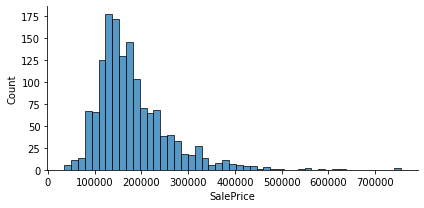

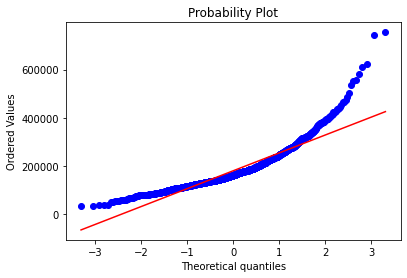

In [ ]:
# checking the distribution for the target
sns.displot(train_dataset['SalePrice'], height=3, aspect=2)


#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_dataset['SalePrice'], plot=plt)
plt.show()

The target variable is has positive skew. This is not good for our linear model. Linear models like normally distributed data. We need to transform the sale price column.

**Log Transformation of Target Variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


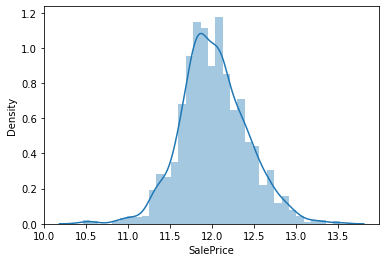

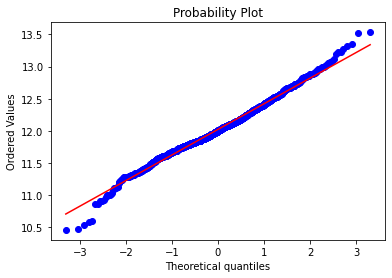

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_dataset["SalePrice"] = np.log1p(train_dataset["SalePrice"])

#Check the new distribution 
sns.distplot(train_dataset['SalePrice']);

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_dataset['SalePrice'], plot=plt)
plt.show()

The data now looks better i.e. it looks normally distributed.

### **Handling missing data**


Remember we concatenated the train and test data set to a dataframe called "whole_dataset". We will use that for our data cleaning so both datasets can be the same when modelling.

In [ ]:
# this function will go through the data frame and return information on columns with missing values such as the number of missing data in
# each column and the percentage of missing value overall for each column
def info_on_missing_values(df):
    total_missing_values = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percentage = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    decription_of_missing_values = pd.concat([total_missing_values, percentage, data_type], axis=1, keys=['Total Missing Val','Percentage','Data Type'])
    return decription_of_missing_values

info_on_missing_values(whole_dataset)[:10] #### remove [:10] to see all columns with missing values

,Total Missing Val,Percentage,Data Type
PoolQC,2909,99.66,object
MiscFeature,2814,96.40,object
Alley,2721,93.22,object
Fence,2348,80.44,object
SalePrice,1459,49.98,float64
FireplaceQu,1420,48.65,object
LotFrontage,486,16.65,float64
GarageCond,159,5.45,object
GarageFinish,159,5.45,object
GarageQual,159,5.45,object


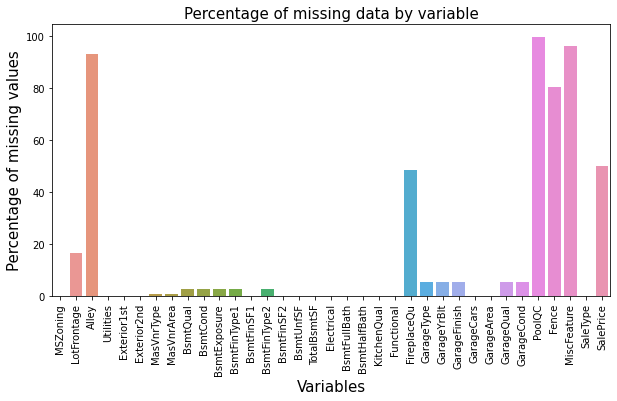

In [ ]:
# plotting a bar chart to show the percentage of missing values in each column with missing values 
def miss_plot(dataset):
  col = dataset.columns[dataset.isna().any().to_list()]
  f, ax = plt.subplots(figsize=(10, 5))
  plt.xticks(rotation='90')
  sns.barplot(x=col, y=(dataset[col].isnull().sum().values)/len(dataset)*100)
  plt.xlabel('Variables', fontsize=15)
  plt.ylabel('Percentage of missing values', fontsize=15)
  plt.title('Percentage of missing data by variable', fontsize=15)
  plt.show()
miss_plot(whole_dataset)

Some columns have a very high percentage of missing values and are most probably insignifcant to our models. We will drop them. Also SalePrice has half missing because the test dataset has no sale price. We will handle that as well.

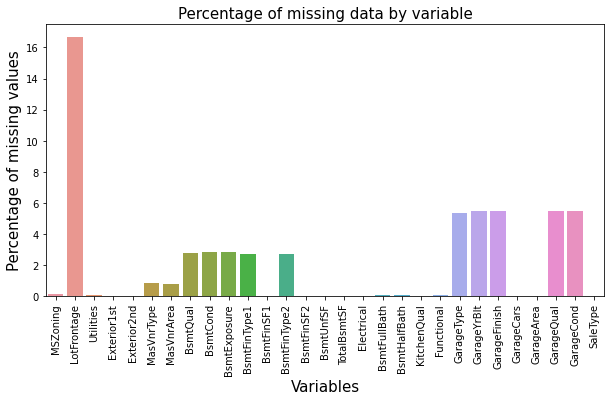

,Total Missing Val,Percentage,Data Type
BsmtFinSF1,1,0.03,float64
GarageCars,1,0.03,float64
TotalBsmtSF,1,0.03,float64
SaleType,1,0.03,object
KitchenQual,1,0.03,object
Electrical,1,0.03,object
Exterior2nd,1,0.03,object
Exterior1st,1,0.03,object
BsmtUnfSF,1,0.03,float64


In [ ]:
# dropping columns with less than 2000 rows of data 
whole_dataset = whole_dataset.dropna(axis=1,thresh=2000)


miss_plot(whole_dataset)
info_on_missing_values(whole_dataset)[20:] # remove "[20:0]" to see complete list of missing values

The columns with high missing values have been dropped

Some columns have only 4 missing values or less. We'll fill those missing columns with 0's or None depending on the data type of the column 

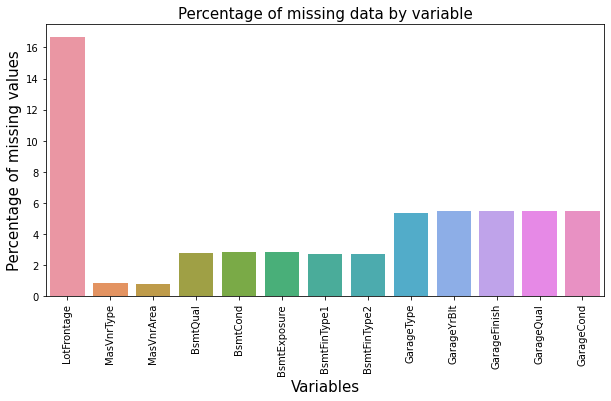

In [ ]:
# making a list of columns with missing values
missing_val_cols = whole_dataset.columns[whole_dataset.isna().any()]
# filling columns with missing values less than 5 with 0 or None
for col in missing_val_cols:
    if whole_dataset[col].isnull().sum() <5:
        if whole_dataset[col].dtype == 'object':
            whole_dataset[col]= whole_dataset[col].fillna('None')
        else:
            whole_dataset[col] = whole_dataset[col].fillna(0)

miss_plot(whole_dataset)

The number of columns with missing data has reduced now we go through each to decide what to fill them with

#### **Analysing each column with missing data**

We go through each column left with missing data individually to decide what method to fill them with is the best 

In [ ]:
# FOR LOTFRONTAGE
display(whole_dataset['LotFrontage'].describe())
# assigning mean value to miss value for LotFrontage
whole_dataset['LotFrontage'] = whole_dataset['LotFrontage'].fillna(whole_dataset['LotFrontage'].mean())


count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
# for MasVnrType
display(whole_dataset['MasVnrType'].describe())
# none has the most frequency. i will use that to fill the missing data. 
whole_dataset['MasVnrType']= whole_dataset['MasVnrType'].fillna(whole_dataset['MasVnrType'].mode()[0])

count     2895
unique       4
top       None
freq      1742
Name: MasVnrType, dtype: object

In [ ]:
# for MasVnrArea
display(whole_dataset['MasVnrArea'].describe())
#assigning mode to MasVnrArea
whole_dataset['MasVnrArea']= whole_dataset['MasVnrArea'].fillna(whole_dataset['MasVnrArea'].mode()[0])

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [ ]:
#for GarageYrBlt
print("---------- GarageYrBlt Description-----------")
display(whole_dataset['GarageYrBlt'].describe())
# Chekcing which column has most correlation with GarageYrBlt column
# looking for correlation between gyb and other collumns

print("---------- Correlation ----------")
print(whole_dataset.corr()['GarageYrBlt'].nlargest(3))
# There is significant coorelation between YearBuilt and GarageYrBlt 
# dropping GarageYrBlt         
whole_dataset = whole_dataset.drop(['GarageYrBlt'],axis = 1)

---------- GarageYrBlt Description-----------


count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

---------- Correlation ----------
GarageYrBlt     1.000000
YearBuilt       0.834812
YearRemodAdd    0.652365
Name: GarageYrBlt, dtype: float64


In [ ]:
# for BsmtExposure
display(whole_dataset['BsmtExposure'].describe())
# filling with mode 
whole_dataset['BsmtExposure']= whole_dataset['BsmtExposure'].fillna(whole_dataset['BsmtExposure'].mode()[0])

count     2837
unique       4
top         No
freq      1904
Name: BsmtExposure, dtype: object

**Observation**

Some columns do not have missing values. They represent none as "NA". 

**Example of Column with such description**

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

We will replace NA with none

In [ ]:
# FOR BsmtQual
whole_dataset['BsmtQual'].describe()
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['BsmtQual']= whole_dataset['BsmtQual'].fillna('None')

# For BsmtCond
whole_dataset['BsmtCond'].describe()
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['BsmtCond']= whole_dataset['BsmtCond'].fillna('None')


#for BsmtFinType1
whole_dataset['BsmtFinType1'].describe()
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['BsmtFinType1']= whole_dataset['BsmtFinType1'].fillna('None')

# for BsmtFinType2
whole_dataset['BsmtFinType2'].describe()
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['BsmtFinType2']= whole_dataset['BsmtFinType2'].fillna('None')


# for GarageType
whole_dataset['GarageType'].describe()
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['GarageType']= whole_dataset['GarageType'].fillna('None')



# for GarageFinish
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['GarageFinish']= whole_dataset['GarageFinish'].fillna('None')


# for GarageQual
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['GarageQual']= whole_dataset['GarageQual'].fillna('None')


# for GarageCond
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['GarageCond']= whole_dataset['GarageCond'].fillna('None')

In [ ]:
# checking for columns with missing values
info_on_missing_values(whole_dataset)

,Total Missing Val,Percentage,Data Type


HURRAY WE HAVE HANDLED ALL THE COLUMNS WITH MISSING VALUES

### **Handling numerical columns**

One assumption for linear regression is that variables are independent. We will go through the dataset and check for columns that have high correlation

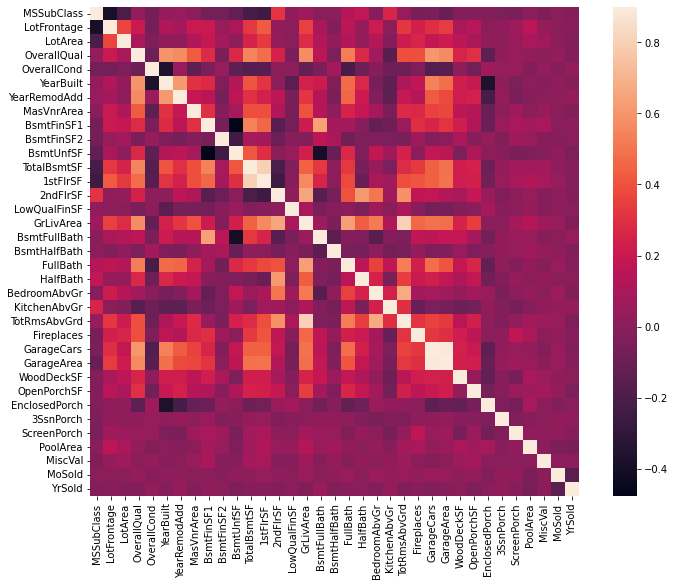

In [ ]:
#Correlation map to see how features are correlated with each other
corrmat = whole_dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

The plot isn't really helpful. We will create a correlation matrix instead and deduce the columns with high correlation



In [ ]:
# Create correlation matrix
corr_matrix = whole_dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.85 and put them in a list
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
#whole_dataset.drop(to_drop,axis=1)
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['GarageArea']

In [ ]:
# checking column that has high correlation with Garage Area
whole_dataset.corr()['GarageArea'].nlargest(3)

GarageArea     1.000000
GarageCars     0.889890
OverallQual    0.565179
Name: GarageArea, dtype: float64

This shows that Garage Area and Garage Cars have a high correlation

```
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

```
From the description we can see most times the garage area and the size of garage in car capacity are either the same or as the car size space increases the garage area increases as well

In [ ]:
# dropping garage cars
whole_dataset = whole_dataset.drop('GarageCars',axis=1)

### **Handling non-numerical columns**

There are columns with categorical data which need to be worked on before using the dataset for a model.

After going through the data description, Some columns have ordinal data and others have nominal data.

**Nominal Data**
```
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
````
**Ordinal Data**
```
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

```

I have gone through the data description and created a list of columns with nonimal ordinal data

#### **Nominal data**

In [ ]:
# This is a list of columns with nominal data 
categorical_columns = ['MSZoning','Street','LotShape','LandContour',
'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
'Electrical','Functional','GarageType','GarageFinish','PavedDrive','SaleType','SaleCondition']


# for nominal data the goal is to transpose the dataset for each category of each column and attach binary values 
whole_dataset = pd.get_dummies(whole_dataset, prefix=categorical_columns, columns=categorical_columns)
whole_dataset.shape

(2919, 236)

After transposing the columns with nominal data the feature size increased from 79 to 236.

#### **Ordinal data**


In [ ]:

# This is a list of columns with ordinal data
ordinal_columns = ['OverallQual','OverallCond','ExterQual','ExterCond',
'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
'HeatingQC','KitchenQual','GarageCond','GarageQual']

# for columns with ordinal data, the solution is to use a label encoder to attach numbers to each level
# the label encoder object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in ordinal_columns:
    whole_dataset[col]=le.fit_transform(whole_dataset[col])

display(whole_dataset.dtypes)

MSSubClass                 int64
LotFrontage              float64
                          ...   
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 236, dtype: object

In [ ]:
# shows columns with object data types
whole_dataset.dtype="object"

All columns with object data types have been changed to numeric values

## **Modelling**

We are going to use a linear regression to build this model

### **First Model**

Remember we combined both test and train dataset for data processing, we will split them for our modelling and create a model using all the variables.

In [ ]:
# spilt the dataset into the original train and test set again
true_train_dataset = whole_dataset[:1460] 
 
true_test_dataset = whole_dataset[1460:] 

# assigning the target variable to Y
Y = train_dataset['SalePrice']


Our first model is going to use all 236 features to make prediction 

In [ ]:

# Running linear regression using all the variables
model = LinearRegression()

print("Running Linear Regression using all variables...")


model.fit(true_train_dataset, Y)

list_of_col = true_train_dataset.columns.to_list()


print("")
# using cross validation to check the accuracy of the model
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, true_train_dataset, Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

print("")

train_estimate = pd.Series(index=list_of_col, data=model.coef_)

est_order = train_estimate.abs().sort_values(ascending=False).index.tolist()

predicted_val = model.predict(true_train_dataset)

#print(metrics.mean_squared_error(predict_test,Y_test))
print('-------Top 10 Features with high estimates ---------')
print(train_estimate[est_order][:10])

Running Linear Regression using all variables...

Cross Validation Scores:  [0.88433362 0.8564229  0.84932194 0.91240595 0.74370154]
Average CV Score:  0.849237190346161
Number of CV Scores used in Average:  5

-------Top 10 Features with high estimates ---------
RoofMatl_ClyTile   -2.441109
Condition2_PosN    -0.716871
RoofMatl_Membran    0.637558
RoofMatl_Metal      0.455063
Condition2_PosA     0.373428
RoofMatl_WdShngl    0.369435
Condition2_RRAe    -0.368398
RoofStyle_Shed      0.343327
MSZoning_C (all)   -0.334841
RoofMatl_Roll       0.285220
dtype: float64


The model is not doing too bad.

After using all the features the model did alright but we have a lot of features.
We would use a feature selection technique to choose only the features that actually help us with predicting our target.

### **Feature Selection**

I am using backward elimination method. 

You can determine how likely it is for your data to have occurred under the null hypothesis by looking at the p-value, or probability value. (Bevans, 2022)

- We use all the features to make a model.
- Then remove the worst performing feature using the p_value with threshold of 0.05.
- Run a new model with the remaining features until the model is doing okay. (Shetye, 2019)






Step 1 of backward elimination 

In [ ]:
# checking the max p_value from the first model with all the features

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(true_train_dataset)
#Fitting sm.OLS model
model_ols = sm.OLS(Y,X_1).fit()
t = pd.DataFrame()
t['pvalue'] = model_ols.pvalues
t[t['pvalue'] == max(t['pvalue'])]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,pvalue
Exterior2nd_Other,0.861116


The next step is to drop the column and rerun the model without that column and rerun the model with the remaining columns

In [ ]:
# This loop reiterates through the dataset and drops columns with high p_values until the model is good 
#Backward Elimination
features = list(true_train_dataset.columns)
columns_removed ={}
pmax = 1
while (len(features)>0):
    verbose = False
    p= []
    X_1 = true_train_dataset[features]
    X_1 = sm.add_constant(X_1)
    model3 = sm.OLS(Y,X_1).fit()
    p = pd.Series(model3.pvalues.values[1:],index = features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        #columns_removed.append(feature_with_p_max)
        features.remove(feature_with_p_max)
        columns_removed[feature_with_p_max] = \
           pmax
    else:
        break

# list of selected features using backward elimation        
selected_features_BE = features

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

We have a list of features we believe should give us a better prediction after using the backward elimination method

In [ ]:
# number of selected features to use
print("Number of features removes: {}".format(len(columns_removed)))
print("Number of Features:{}".format(len(selected_features_BE)))
print("Selected features are: {}".format(selected_features_BE))

Number of features removes: 129
Number of Features:107
Selected features are: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_

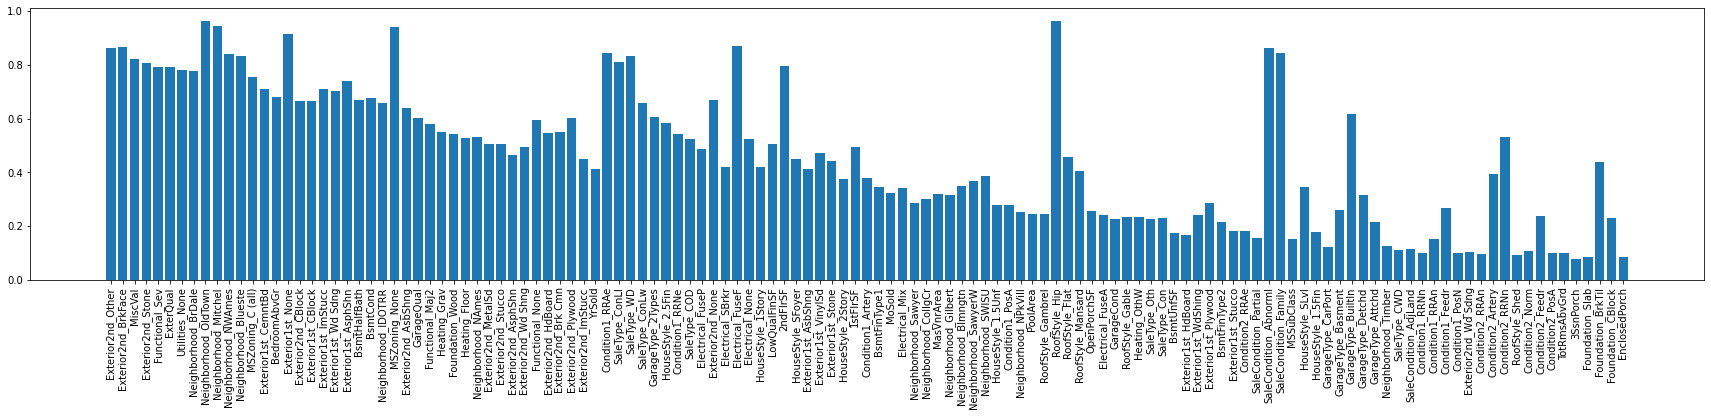

In [ ]:
# creating a bar chart that shows the p_value of all the columns that were removed
f, ax = plt.subplots(figsize=(30, 5))
names = list(columns_removed.keys())
values = list(columns_removed.values())
plt.bar(range(len(columns_removed)), values, tick_label=names)
plt.xticks(rotation="vertical")
plt.show()

Based on backward elmination, a lot categorical columns that were tranformed have low significance based on the pvalues they have from each model e.g the type of neighborhood plays little role in the predicting house prices.

In [ ]:
# Our loop selected 107 features to use to get a better model

### Creating a new test and train dataset with the columns choosen using backward elimination
new_train_dataset = true_train_dataset[selected_features_BE]
new_test_dataset = true_test_dataset[selected_features_BE]


# creating model
model4 = LinearRegression()

# fitting the model
model4.fit(new_train_dataset, Y)

list_of_col = new_train_dataset.columns.to_list()


### **Final Model Accuracy**

We need to check how well our model is doing. We are aiming to increase overall model performance on unseen data. We use cross validation to know how well our model is doing.

In [ ]:
# using CV score to cross validate our model by splitting the data set into 10 for testing
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model4, new_train_dataset, Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.90932208 0.8851838  0.86722982 0.92693638 0.73293369]
Average CV Score:  0.8643211561833025
Number of CV Scores used in Average:  5


This model is doing better compared to our first model 

Creating a residual plot to check how well the model worked on training dataset

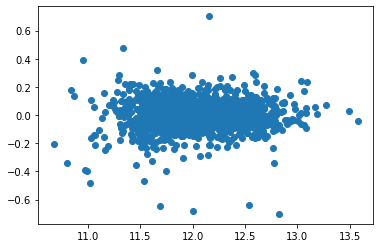

In [ ]:
# using the model to predict from the train dataset
y_pred = model4.predict(new_train_dataset)

#calculating the residual which is the actual value minus the predicted value
residuals = Y-y_pred

# creating a residual plot 
plt.scatter(y = residuals,x = y_pred)

plt.show()

From the residual plot, the points are close to zero which is good. However the points do not have constant variance which means our model can be improved.

In [ ]:
# print out model variable coefficients
est_coef = pd.Series(index=list_of_col, data=model4.coef_)

est_order = est_coef.abs().sort_values(ascending=False).index.tolist()

print("----- Coefficients in Linear Regressions -------")
for i in range(0,len(new_train_dataset.columns)-1):
    if model4.coef_[i] == 0:
        print("{}:{}".format(list_of_col[i],model4.coef_[i]))
        
print('-------Top 10 Features with high estimates ---------')
print(est_coef[est_order][:10])

----- Coefficients in Linear Regressions -------
SaleType_None:0.0
-------Top 10 Features with high estimates ---------
RoofMatl_ClyTile   -2.496388
Condition2_PosN    -0.862393
RoofMatl_Membran    0.600497
RoofMatl_Metal      0.478032
MSZoning_RH         0.418199
MSZoning_FV         0.412944
MSZoning_RL         0.410313
MSZoning_RM         0.354843
RoofMatl_WdShngl    0.326137
Functional_Typ      0.307409
dtype: float64


### **Running Model on Kaggle test dataset**

In [ ]:
# predicting numbers for kaggle test dataset
y_pred = model4.predict(new_test_dataset)

# setting predictions into data frame as in kaggle's sample submission
submission=pd.DataFrame()
submission['SalePrice']=np.exp(y_pred) # the sale price was logged in the beggining so we have to transform it back
submission = submission.reset_index()
submission = submission.rename(columns={"index":"Id"})
submission['Id'] = submission.index + len(submission)+2

# loading the data frame to csv files for submission
submission.to_csv('project_1_submission.csv',index=False)
  

# **Interpretation of model**

## **Number of variables**


In our final model, we've been able to improve our model by using only 107 variables instead of using all 236 variables. This suggests that the variables which were ommited such as if the Exterior covering on house is classified as other did not seem to help predict the house price.


## **Coefficient Interpretation**

-------Top 10 Features with high estimates ---------
* RoofMatl_ClyTile:-      -2.496388
* Condition2_PosN :-      -0.862393
* RoofMatl_Membran:-      0.600497
* RoofMatl_Metal:-        0.478032
* MSZoning_RH:-         0.418199
* MSZoning_FV:-        0.412944
* MSZoning_RL:-         0.410313
* MSZoning_RM:-        0.354843
* RoofMatl_WdShngl:-    0.326137
* Functional_Typ:-      0.307409


According to the coefficients gotten from the model,
  1. Roof materials
    - a house whose roof is made with clytile clay or tile reduce the price of a house.
   - a house with roof is made of Membrane or Metal increase the price of the house.
  2. Proximity to various conditions (if more than one is present)
    - Houses near positive off-site feature--park, greenbelt, etc reduce the price of house.
  3. MS Zoning
    - Houses in Floating Village(FV), Low Density(RL) and Medium Density(RM) increases the price of a house.
  4. SaleType
  - The column that shows when the type of sale is equal to none plays no role in predicting house price.




#### **Description of the top features**


```
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

	RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

 Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	

## **Conclusion on model**



Our final model is doing better than the first model. Going through the residual plot the model is doing good, however it can be improved by maybe tranforming some variables after more careful data analysis

# **Citation**

- Bevans, R. (2022) The p-value explained, Scribbr. Available at: https://www.scribbr.com/statistics/p-value/#:~:text=The%20p%2Dvalue%2C%20or%20probability,statistical%20test%20using%20your%20data. (Accessed: October 15, 2022). 
- Shetye, A. (2019) Feature selection with sklearn and Pandas, Medium. Towards Data Science. Available at: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b (Accessed: October 15, 2022). 